# Libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import re
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
import requests
from io import StringIO
import time
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from scipy.spatial.distance import pdist, squareform
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Data

In [23]:
df = pd.read_csv('/Users/atharvavyas/Downloads/animal_df.csv')

In [24]:
df.head()

,animal_type,has_name,outcome_group,age_days_outcome,age_group_intake,los_at_shelter,month_of_outcome,is_fixed,breed_type,color_group,intake_condition_group
0,Dog,0,Positive,733,Young Adult,1,February,0,Pure,Brown,Injured
1,Dog,1,Neutral,916,Young Adult,1,February,0,Mix,Black,Healthy/Normal
2,Cat,1,Positive,176,Puppy/Kitten,2,February,1,Pure,Red,Healthy/Normal
3,Other,0,Negative,732,Young Adult,1,February,0,Pure,Brown,Healthy/Normal
4,Cat,1,Positive,367,Young Adult,1,February,1,Pure,Brown,Healthy/Normal


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118562 entries, 0 to 118561
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   animal_type             118562 non-null  object
 1   has_name                118562 non-null  int64 
 2   outcome_group           118562 non-null  object
 3   age_days_outcome        118562 non-null  int64 
 4   age_group_intake        118562 non-null  object
 5   los_at_shelter          118562 non-null  int64 
 6   month_of_outcome        118562 non-null  object
 7   is_fixed                118562 non-null  int64 
 8   breed_type              118562 non-null  object
 9   color_group             118562 non-null  object
 10  intake_condition_group  118562 non-null  object
dtypes: int64(4), object(7)
memory usage: 10.0+ MB


# Clustering

## Removing the target 

In [26]:
df_clustering = df.drop(columns=['outcome_group'])

In [27]:
df_sampled = df_clustering.sample(n=30000, random_state=42)

In [28]:
numerical_features = ['has_name', 'age_days_outcome', 'los_at_shelter', 'is_fixed']
categorical_features = ['animal_type', 'age_group_intake', 'month_of_outcome', 'breed_type', 'color_group','intake_condition_group']

In [29]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

In [32]:
preproccessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

X_transformed = preproccessor.fit_transform(df_sampled)
X_array = X_transformed.toarray()

## Hierarchical clustering model

### Finding the optimal number of clusters using silhouette scores

Silhouette Score for 2 clusters: 0.7988
Silhouette Score for 3 clusters: 0.7775
Silhouette Score for 4 clusters: 0.6042
Silhouette Score for 5 clusters: 0.4862
Silhouette Score for 6 clusters: 0.4856
Silhouette Score for 7 clusters: 0.3015
Silhouette Score for 8 clusters: 0.2902
Silhouette Score for 9 clusters: 0.2504
Silhouette Score for 10 clusters: 0.2503


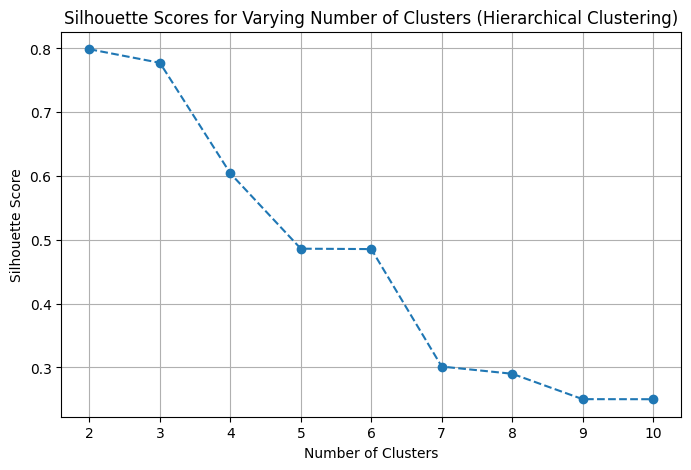

In [44]:
sil_scores = []
cluster_range = range(2, 11)  # Evaluate cluster numbers from 2 to 10

for k in cluster_range:
    agg_model = AgglomerativeClustering(n_clusters=k, linkage='average')
    cluster_labels = agg_model.fit_predict(X_array)
    score = silhouette_score(X_array, cluster_labels, metric='manhattan')
    sil_scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Plot the silhouette scores to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_range), sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Varying Number of Clusters (Hierarchical Clustering)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(list(cluster_range))
plt.grid(True)
plt.show()

### 2-clusters

Silhouette Score: 0.9109750005181038
Clustered Data Sample:
      animal_type  has_name  age_days_outcome age_group_intake  \
83147         Dog         0                57     Puppy/Kitten   
79589         Cat         1                55     Puppy/Kitten   
52481         Cat         1                36     Puppy/Kitten   
52247         Dog         1               372      Young Adult   
6108          Cat         1                84     Puppy/Kitten   

       los_at_shelter month_of_outcome  is_fixed breed_type color_group  \
83147              24         November         1        Mix       Black   
79589              24            March         1        Mix       White   
52481              14             June         0       Pure       Black   
52247               7             June         1        Mix       Brown   
6108               31             June         1       Pure       White   

      intake_condition_group  agg_cluster  
83147         Healthy/Normal            1  
7958

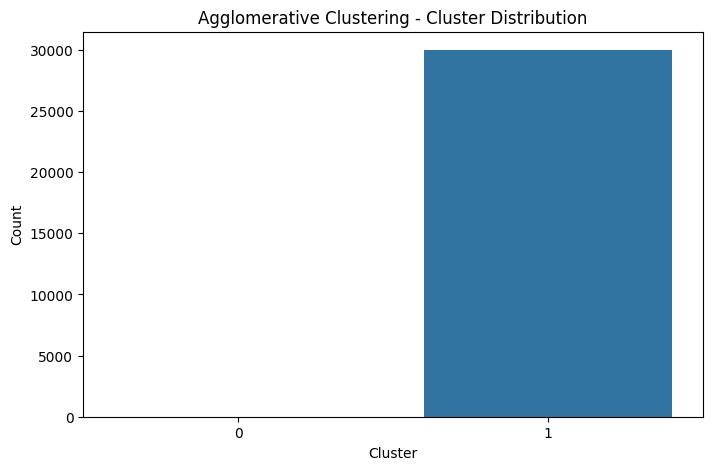

CLUSTER ANALYSIS SUMMARY

📊 CLUSTER 0 PROFILE
Samples: 4 (0.0% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 3336.8 days (2591.7 days older than overall average)
⏱️ LENGTH OF STAY: Average LOS: 2621.0 days (2594.5 days longer than overall average)

🐾 ANIMAL TYPES:
  • Dog: 100.0% (44.8% higher than overall)

🏥 INTAKE CONDITIONS:
  • Healthy/Normal: 100.0% (12.3% higher than overall)

📊 AGE GROUP (Intake):
  • Puppy/Kitten: 50.0% (3.1% higher than overall)
  • Adult: 25.0% (11.5% higher than overall)
  • Young Adult: 25.0% (6.9% lower than overall)

🗓️ MONTH OF OUTCOME:
  • October: 50.0% (41.1% higher than overall)
  • July: 25.0% (15.1% higher than overall)
  • November: 25.0% (16.5% higher than overall)

🐕 BREED TYPES:
  • Mix: 100.0% (40.4% higher than overall)

🎨 COLOR DISTRIBUTION:
  • White: 100.0% (66.8% higher than overall)

🔑 KEY INSIGHTS:
  • High proportion of Dog
  • More likely to have Healthy/Normal intake condition
  • Older ani

In [45]:
# Compute Distance Matrix (optional; not needed for clustering with AgglomerativeClustering)
distance_matrix = squareform(pdist(X_array, metric='euclidean'))

# Perform Agglomerative Clustering using 'complete' linkage (you can adjust n_clusters as needed)
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
df_sampled['agg_cluster'] = agg_clustering.fit_predict(X_array)

# Calculate Silhouette Score
sil_score = silhouette_score(X_array, df_sampled['agg_cluster'], metric='euclidean')
print("Silhouette Score:", sil_score)

# Save the clustered dataset to CSV
df_sampled.to_csv("clustered_animal_shelter_data.csv", index=False)

# Print a sample of the clustered data
print("Clustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['agg_cluster'])
plt.title("Agglomerative Clustering - Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall metrics using df_sampled
overall_animal_dist = df_sampled['animal_type'].value_counts(normalize=True) * 100
overall_intake_condition_dist = df_sampled['intake_condition_group'].value_counts(normalize=True) * 100
overall_age_mean = df_sampled['age_days_outcome'].mean()
overall_los_mean = df_sampled['los_at_shelter'].mean()

# Calculate overall distributions for additional categorical variables
overall_age_group_intake_dist = df_sampled['age_group_intake'].value_counts(normalize=True) * 100
overall_month_dist = df_sampled['month_of_outcome'].value_counts(normalize=True) * 100
overall_breed_dist = df_sampled['breed_type'].value_counts(normalize=True) * 100
overall_color_dist = df_sampled['color_group'].value_counts(normalize=True) * 100

print("CLUSTER ANALYSIS SUMMARY")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = df_sampled[df_sampled['agg_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days_outcome'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than overall average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Length of stay analysis
    cluster_los_mean = cluster_data['los_at_shelter'].mean()
    los_diff = cluster_los_mean - overall_los_mean
    los_diff_text = f"{abs(los_diff):.1f} days {'longer' if los_diff > 0 else 'shorter'} than overall average"
    print(f"⏱️ LENGTH OF STAY: Average LOS: {cluster_los_mean:.1f} days ({los_diff_text})")
    
    # Animal type analysis
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Intake condition analysis
    cluster_intake_condition_dist = cluster_data['intake_condition_group'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_condition_dist.head(3).items():
        overall_pct = overall_intake_condition_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Age group intake analysis
    cluster_age_group_dist = cluster_data['age_group_intake'].value_counts(normalize=True) * 100
    print("\n📊 AGE GROUP (Intake):")
    for group, pct in cluster_age_group_dist.head(3).items():
        overall_pct = overall_age_group_intake_dist.get(group, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {group}: {pct:.1f}% ({diff_text})")
    
    # Month of outcome analysis
    cluster_month_dist = cluster_data['month_of_outcome'].value_counts(normalize=True) * 100
    print("\n🗓️ MONTH OF OUTCOME:")
    for month, pct in cluster_month_dist.head(3).items():
        overall_pct = overall_month_dist.get(month, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {month}: {pct:.1f}% ({diff_text})")
    
    # Breed type analysis
    cluster_breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in cluster_breed_dist.head(3).items():
        overall_pct = overall_breed_dist.get(breed, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {breed}: {pct:.1f}% ({diff_text})")
    
    # Color group analysis
    cluster_color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in cluster_color_dist.head(3).items():
        overall_pct = overall_color_dist.get(color, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {color}: {pct:.1f}% ({diff_text})")
    
    # Cluster key insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal type differences
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0))
                    for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check intake condition differences
    intake_diffs = [(cond, pct - overall_intake_condition_dist.get(cond, 0))
                    for cond, pct in cluster_intake_condition_dist.items()]
    intake_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_diffs and intake_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {intake_diffs[0][0]} intake condition")
    
    # Age difference insight
    if abs(age_diff) > (overall_age_mean * 0.2):
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # LOS difference insight
    if abs(los_diff) > (overall_los_mean * 0.2):
        distinctive_features.append(f"{'Longer' if los_diff > 0 else 'Shorter'} shelter stays")
    
    # Print up to three key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(intake_diffs[:2]).lower():
        print("  • Analyze factors contributing to successful adoptions in this cluster")
    if age_diff > 0:
        print("  • Consider targeted interventions for older animals")
    if los_diff > 0:
        print("  • Investigate factors causing longer shelter stays")
    
    print("=" * 50)

### 3-clusters

Silhouette Score: 0.8992370106254238
Clustered Data Sample:
      animal_type  has_name  age_days_outcome age_group_intake  \
83147         Dog         0                57     Puppy/Kitten   
79589         Cat         1                55     Puppy/Kitten   
52481         Cat         1                36     Puppy/Kitten   
52247         Dog         1               372      Young Adult   
6108          Cat         1                84     Puppy/Kitten   

       los_at_shelter month_of_outcome  is_fixed breed_type color_group  \
83147              24         November         1        Mix       Black   
79589              24            March         1        Mix       White   
52481              14             June         0       Pure       Black   
52247               7             June         1        Mix       Brown   
6108               31             June         1       Pure       White   

      intake_condition_group  agg_cluster  
83147         Healthy/Normal            0  
7958

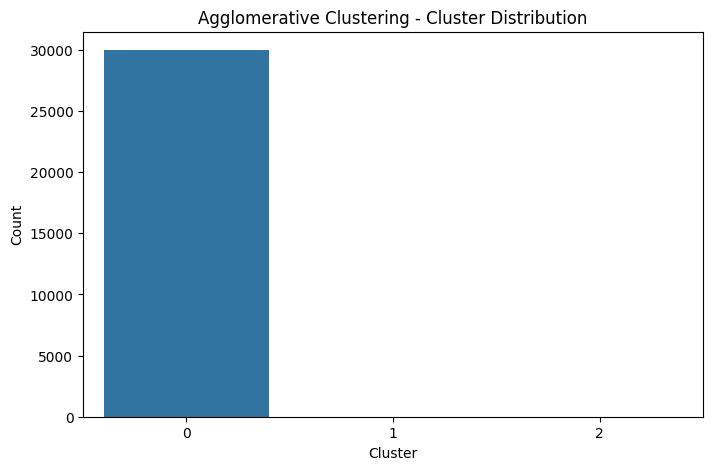

CLUSTER ANALYSIS SUMMARY

📊 CLUSTER 0 PROFILE
Samples: 29996 (100.0% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 744.7 days (-0.3 days younger than overall average)
⏱️ LENGTH OF STAY: Average LOS: 26.1 days (0.3 days shorter than overall average)

🐾 ANIMAL TYPES:
  • Dog: 55.2% (0.0% lower than overall)
  • Cat: 41.7% (0.0% higher than overall)
  • Other: 2.7% (0.0% higher than overall)

🏥 INTAKE CONDITIONS:
  • Healthy/Normal: 87.7% (0.0% lower than overall)
  • Injured: 5.7% (0.0% higher than overall)
  • Sick/Medical: 3.8% (0.0% higher than overall)

📊 AGE GROUP (Intake):
  • Puppy/Kitten: 46.9% (0.0% lower than overall)
  • Young Adult: 31.9% (0.0% higher than overall)
  • Adult: 13.5% (0.0% lower than overall)

🗓️ MONTH OF OUTCOME:
  • July: 9.9% (0.0% lower than overall)
  • June: 9.4% (0.0% higher than overall)
  • August: 9.3% (0.0% higher than overall)

🐕 BREED TYPES:
  • Mix: 59.6% (0.0% lower than overall)
  • Pure: 40.4% (0.0% hi

In [46]:
# Compute Distance Matrix (optional; not needed for clustering with AgglomerativeClustering)
distance_matrix = squareform(pdist(X_array, metric='euclidean'))

# Perform Agglomerative Clustering using 'complete' linkage (you can adjust n_clusters as needed)
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
df_sampled['agg_cluster'] = agg_clustering.fit_predict(X_array)

# Calculate Silhouette Score
sil_score = silhouette_score(X_array, df_sampled['agg_cluster'], metric='euclidean')
print("Silhouette Score:", sil_score)

# Save the clustered dataset to CSV
df_sampled.to_csv("clustered_animal_shelter_data.csv", index=False)

# Print a sample of the clustered data
print("Clustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['agg_cluster'])
plt.title("Agglomerative Clustering - Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall metrics using df_sampled
overall_animal_dist = df_sampled['animal_type'].value_counts(normalize=True) * 100
overall_intake_condition_dist = df_sampled['intake_condition_group'].value_counts(normalize=True) * 100
overall_age_mean = df_sampled['age_days_outcome'].mean()
overall_los_mean = df_sampled['los_at_shelter'].mean()

# Calculate overall distributions for additional categorical variables
overall_age_group_intake_dist = df_sampled['age_group_intake'].value_counts(normalize=True) * 100
overall_month_dist = df_sampled['month_of_outcome'].value_counts(normalize=True) * 100
overall_breed_dist = df_sampled['breed_type'].value_counts(normalize=True) * 100
overall_color_dist = df_sampled['color_group'].value_counts(normalize=True) * 100

print("CLUSTER ANALYSIS SUMMARY")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = df_sampled[df_sampled['agg_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days_outcome'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than overall average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Length of stay analysis
    cluster_los_mean = cluster_data['los_at_shelter'].mean()
    los_diff = cluster_los_mean - overall_los_mean
    los_diff_text = f"{abs(los_diff):.1f} days {'longer' if los_diff > 0 else 'shorter'} than overall average"
    print(f"⏱️ LENGTH OF STAY: Average LOS: {cluster_los_mean:.1f} days ({los_diff_text})")
    
    # Animal type analysis
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Intake condition analysis
    cluster_intake_condition_dist = cluster_data['intake_condition_group'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_condition_dist.head(3).items():
        overall_pct = overall_intake_condition_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Age group intake analysis
    cluster_age_group_dist = cluster_data['age_group_intake'].value_counts(normalize=True) * 100
    print("\n📊 AGE GROUP (Intake):")
    for group, pct in cluster_age_group_dist.head(3).items():
        overall_pct = overall_age_group_intake_dist.get(group, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {group}: {pct:.1f}% ({diff_text})")
    
    # Month of outcome analysis
    cluster_month_dist = cluster_data['month_of_outcome'].value_counts(normalize=True) * 100
    print("\n🗓️ MONTH OF OUTCOME:")
    for month, pct in cluster_month_dist.head(3).items():
        overall_pct = overall_month_dist.get(month, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {month}: {pct:.1f}% ({diff_text})")
    
    # Breed type analysis
    cluster_breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in cluster_breed_dist.head(3).items():
        overall_pct = overall_breed_dist.get(breed, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {breed}: {pct:.1f}% ({diff_text})")
    
    # Color group analysis
    cluster_color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in cluster_color_dist.head(3).items():
        overall_pct = overall_color_dist.get(color, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {color}: {pct:.1f}% ({diff_text})")
    
    # Cluster key insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal type differences
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0))
                    for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check intake condition differences
    intake_diffs = [(cond, pct - overall_intake_condition_dist.get(cond, 0))
                    for cond, pct in cluster_intake_condition_dist.items()]
    intake_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_diffs and intake_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {intake_diffs[0][0]} intake condition")
    
    # Age difference insight
    if abs(age_diff) > (overall_age_mean * 0.2):
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # LOS difference insight
    if abs(los_diff) > (overall_los_mean * 0.2):
        distinctive_features.append(f"{'Longer' if los_diff > 0 else 'Shorter'} shelter stays")
    
    # Print up to three key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(intake_diffs[:2]).lower():
        print("  • Analyze factors contributing to successful adoptions in this cluster")
    if age_diff > 0:
        print("  • Consider targeted interventions for older animals")
    if los_diff > 0:
        print("  • Investigate factors causing longer shelter stays")
    
    print("=" * 50)

### 4-clusters

Silhouette Score: 0.7728715889637602
Clustered Data Sample:
      animal_type  has_name  age_days_outcome age_group_intake  \
83147         Dog         0                57     Puppy/Kitten   
79589         Cat         1                55     Puppy/Kitten   
52481         Cat         1                36     Puppy/Kitten   
52247         Dog         1               372      Young Adult   
6108          Cat         1                84     Puppy/Kitten   

       los_at_shelter month_of_outcome  is_fixed breed_type color_group  \
83147              24         November         1        Mix       Black   
79589              24            March         1        Mix       White   
52481              14             June         0       Pure       Black   
52247               7             June         1        Mix       Brown   
6108               31             June         1       Pure       White   

      intake_condition_group  agg_cluster  
83147         Healthy/Normal            0  
7958

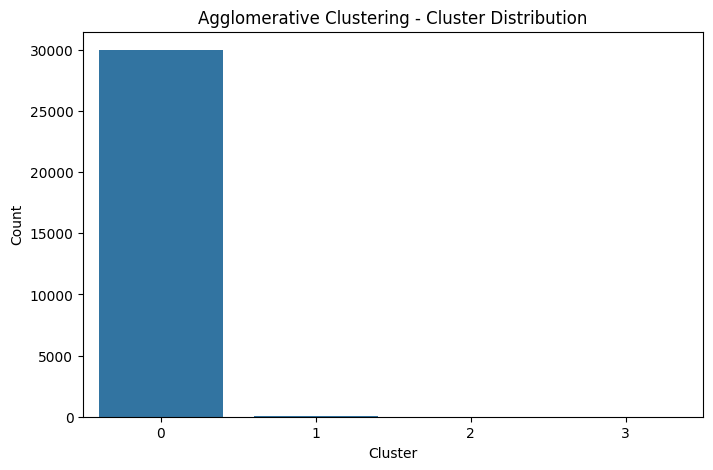

CLUSTER ANALYSIS SUMMARY

📊 CLUSTER 0 PROFILE
Samples: 29977 (99.9% of total)
--------------------------------------------------
📅 AGE PROFILE: Average age: 743.5 days (-1.5 days younger than overall average)
⏱️ LENGTH OF STAY: Average LOS: 25.5 days (1.0 days shorter than overall average)

🐾 ANIMAL TYPES:
  • Dog: 55.2% (0.0% lower than overall)
  • Cat: 41.7% (0.0% higher than overall)
  • Other: 2.7% (0.0% higher than overall)

🏥 INTAKE CONDITIONS:
  • Healthy/Normal: 87.7% (0.0% lower than overall)
  • Injured: 5.7% (0.0% higher than overall)
  • Sick/Medical: 3.8% (0.0% higher than overall)

📊 AGE GROUP (Intake):
  • Puppy/Kitten: 46.9% (0.0% higher than overall)
  • Young Adult: 31.9% (0.0% higher than overall)
  • Adult: 13.5% (0.0% lower than overall)

🗓️ MONTH OF OUTCOME:
  • July: 9.9% (0.0% lower than overall)
  • June: 9.4% (0.0% higher than overall)
  • August: 9.3% (0.0% higher than overall)

🐕 BREED TYPES:
  • Mix: 59.6% (0.0% lower than overall)
  • Pure: 40.4% (0.0% hi

In [47]:
# Compute Distance Matrix (optional; not needed for clustering with AgglomerativeClustering)
distance_matrix = squareform(pdist(X_array, metric='euclidean'))

# Perform Agglomerative Clustering using 'complete' linkage (you can adjust n_clusters as needed)
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
df_sampled['agg_cluster'] = agg_clustering.fit_predict(X_array)

# Calculate Silhouette Score
sil_score = silhouette_score(X_array, df_sampled['agg_cluster'], metric='euclidean')
print("Silhouette Score:", sil_score)

# Save the clustered dataset to CSV
df_sampled.to_csv("clustered_animal_shelter_data.csv", index=False)

# Print a sample of the clustered data
print("Clustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['agg_cluster'])
plt.title("Agglomerative Clustering - Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall metrics using df_sampled
overall_animal_dist = df_sampled['animal_type'].value_counts(normalize=True) * 100
overall_intake_condition_dist = df_sampled['intake_condition_group'].value_counts(normalize=True) * 100
overall_age_mean = df_sampled['age_days_outcome'].mean()
overall_los_mean = df_sampled['los_at_shelter'].mean()

# Calculate overall distributions for additional categorical variables
overall_age_group_intake_dist = df_sampled['age_group_intake'].value_counts(normalize=True) * 100
overall_month_dist = df_sampled['month_of_outcome'].value_counts(normalize=True) * 100
overall_breed_dist = df_sampled['breed_type'].value_counts(normalize=True) * 100
overall_color_dist = df_sampled['color_group'].value_counts(normalize=True) * 100

print("CLUSTER ANALYSIS SUMMARY")
print("=" * 50)

for cluster in range(n_clusters):
    cluster_data = df_sampled[df_sampled['agg_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    
    print(f"\n📊 CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print("-" * 50)
    
    # Age analysis
    cluster_age_mean = cluster_data['age_days_outcome'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than overall average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Length of stay analysis
    cluster_los_mean = cluster_data['los_at_shelter'].mean()
    los_diff = cluster_los_mean - overall_los_mean
    los_diff_text = f"{abs(los_diff):.1f} days {'longer' if los_diff > 0 else 'shorter'} than overall average"
    print(f"⏱️ LENGTH OF STAY: Average LOS: {cluster_los_mean:.1f} days ({los_diff_text})")
    
    # Animal type analysis
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Intake condition analysis
    cluster_intake_condition_dist = cluster_data['intake_condition_group'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_condition_dist.head(3).items():
        overall_pct = overall_intake_condition_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Age group intake analysis
    cluster_age_group_dist = cluster_data['age_group_intake'].value_counts(normalize=True) * 100
    print("\n📊 AGE GROUP (Intake):")
    for group, pct in cluster_age_group_dist.head(3).items():
        overall_pct = overall_age_group_intake_dist.get(group, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {group}: {pct:.1f}% ({diff_text})")
    
    # Month of outcome analysis
    cluster_month_dist = cluster_data['month_of_outcome'].value_counts(normalize=True) * 100
    print("\n🗓️ MONTH OF OUTCOME:")
    for month, pct in cluster_month_dist.head(3).items():
        overall_pct = overall_month_dist.get(month, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {month}: {pct:.1f}% ({diff_text})")
    
    # Breed type analysis
    cluster_breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in cluster_breed_dist.head(3).items():
        overall_pct = overall_breed_dist.get(breed, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {breed}: {pct:.1f}% ({diff_text})")
    
    # Color group analysis
    cluster_color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in cluster_color_dist.head(3).items():
        overall_pct = overall_color_dist.get(color, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {color}: {pct:.1f}% ({diff_text})")
    
    # Cluster key insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal type differences
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0))
                    for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check intake condition differences
    intake_diffs = [(cond, pct - overall_intake_condition_dist.get(cond, 0))
                    for cond, pct in cluster_intake_condition_dist.items()]
    intake_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_diffs and intake_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {intake_diffs[0][0]} intake condition")
    
    # Age difference insight
    if abs(age_diff) > (overall_age_mean * 0.2):
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # LOS difference insight
    if abs(los_diff) > (overall_los_mean * 0.2):
        distinctive_features.append(f"{'Longer' if los_diff > 0 else 'Shorter'} shelter stays")
    
    # Print up to three key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if "adoption" in str(intake_diffs[:2]).lower():
        print("  • Analyze factors contributing to successful adoptions in this cluster")
    if age_diff > 0:
        print("  • Consider targeted interventions for older animals")
    if los_diff > 0:
        print("  • Investigate factors causing longer shelter stays")
    
    print("=" * 50)

Overall, hierarchical clustering doesn't make sense, due to the cluster size differences. Its not something that can be made sense out of.

## Gausian Mixture Model

### Finding out ideal cluster size(s) with silhouette scores

Python(13057) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Silhouette Score for 2 components: 0.1825
Silhouette Score for 3 components: 0.1824
Silhouette Score for 4 components: 0.1328
Silhouette Score for 5 components: 0.1282
Silhouette Score for 6 components: 0.1296
Silhouette Score for 7 components: 0.1486
Silhouette Score for 8 components: 0.1353
Silhouette Score for 9 components: 0.0486
Silhouette Score for 10 components: 0.0427


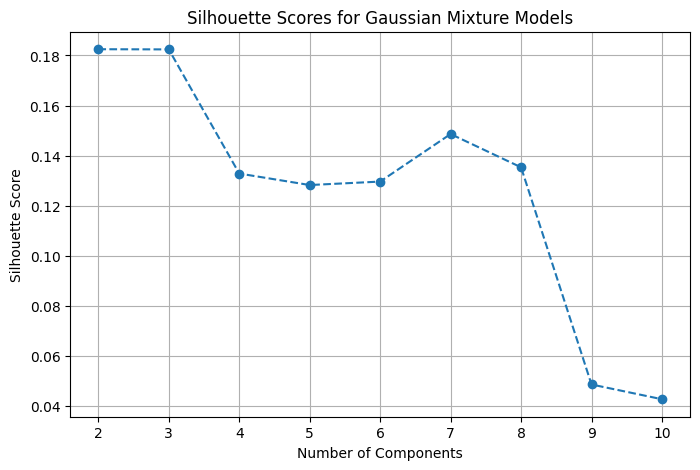

In [48]:
sil_scores = []
cluster_range = range(2, 11)  # Testing components from 2 to 10

for k in cluster_range:
    gm = GaussianMixture(n_components=k, n_init=10, random_state=42)
    gm.fit(X_array)
    cluster_labels = gm.predict(X_array)
    score = silhouette_score(X_array, cluster_labels, metric='euclidean')
    sil_scores.append(score)
    print(f"Silhouette Score for {k} components: {score:.4f}")

# Plot the silhouette scores to help determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(list(cluster_range), sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Gaussian Mixture Models")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.xticks(list(cluster_range))
plt.grid(True)
plt.show()

### 2-clusters

Cluster Weights:
 [0.2681 0.7319]

Cluster Means:
 [[-1.53367978e+00 -2.88428220e-01 -1.94568452e-01 -4.99712587e-01
   1.66604501e-02  5.02921795e-01  3.79833395e-01  8.70322019e-04
   9.97140371e-02  5.69439264e-02  5.94429939e-01  3.64291931e-02
   3.12196941e-01  6.72634589e-02  8.35509138e-02  7.74586597e-02
   6.30361805e-02  7.31070496e-02  1.09784906e-01  1.05806291e-01
   6.88797712e-02  8.92701728e-02  8.74051971e-02  9.22541340e-02
   8.21832650e-02  5.47556882e-01  4.52443118e-01  3.00385428e-01
   1.52182022e-01  3.15802561e-02  6.76364541e-02  0.00000000e+00
   7.73343280e-02  5.06030088e-02  2.13850553e-02  2.98893448e-01
   6.21658585e-03  7.86771105e-01  6.14198682e-02  9.06378217e-02
   7.45990302e-03  4.74947159e-02]
 [ 5.61797442e-01  1.05653239e-01  7.12717612e-02  1.83048155e-01
   0.00000000e+00  3.85025277e-01  6.14974723e-01  0.00000000e+00
   0.00000000e+00  1.64093455e-01  4.23372956e-01  9.08594070e-02
   3.21674181e-01  6.55827299e-02  9.68256137e-02  9.782

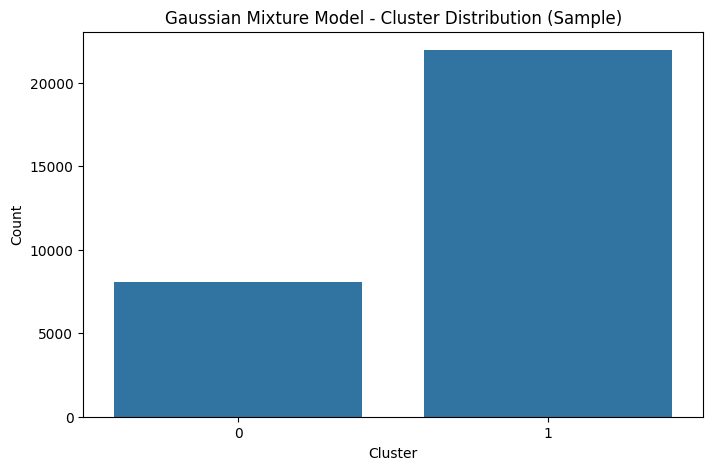

GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS

📊 GMM CLUSTER 0 PROFILE
Samples: 8043 (26.8% of total)
Average assignment probability: 100.0%
--------------------------------------------------
📅 AGE PROFILE: Average age: 455.3 days (-289.8 days younger than overall average)
⏱️ LENGTH OF STAY: Average LOS: 14.2 days (12.3 days shorter than overall average)

🐾 ANIMAL TYPES:
  • Cat: 50.3% (8.6% higher than overall)
  • Dog: 38.0% (17.2% lower than overall)
  • Other: 10.0% (7.3% higher than overall)

🏥 INTAKE CONDITIONS:
  • Healthy/Normal: 78.7% (9.0% lower than overall)
  • Life Stage/Developmental: 9.1% (6.6% higher than overall)
  • Injured: 6.1% (0.4% higher than overall)

📊 AGE GROUP (Intake):
  • Puppy/Kitten: 59.4% (12.5% higher than overall)
  • Young Adult: 31.2% (0.7% lower than overall)
  • Adult: 5.7% (7.8% lower than overall)

🗓️ MONTH OF OUTCOME:
  • July: 11.0% (1.0% higher than overall)
  • June: 10.6% (1.1% higher than overall)
  • October: 9.2% (0.3% higher than overall)

🐕 B

In [50]:
# Perform Gaussian Mixture Clustering
n_components = 2  # Number of clusters
gm = GaussianMixture(n_components=n_components, n_init=10, random_state=42)
gm.fit(X_array)

# Extract Model Parameters
print("Cluster Weights:\n", gm.weights_)
print("\nCluster Means:\n", gm.means_)
print("\nCovariances:\n", gm.covariances_)
print("\nDid the model converge?:", gm.converged_)
print("Number of iterations:", gm.n_iter_)

# Assign Hard Clustering Labels
df_sampled['gmm_cluster'] = gm.predict(X_array)

# Assign Soft Clustering Probabilities (using the maximum probability per sample)
soft_clusters = gm.predict_proba(X_array)
df_sampled['gmm_soft_cluster'] = soft_clusters.max(axis=1)

# Generate New Synthetic Samples (for demonstration)
X_new, y_new = gm.sample(7)
print("\nGenerated Samples:\n", X_new)
print("\nGenerated Sample Labels:\n", y_new)

# Estimate Density Scores at each sample point
density_scores = gm.score_samples(X_array)
df_sampled['density_score'] = density_scores

# Save clustered dataset to CSV
df_sampled.to_csv("gmm_clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("\nClustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['gmm_cluster'])
plt.title("Gaussian Mixture Model - Cluster Distribution (Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall distributions and metrics from df_sampled
overall_animal_dist = df_sampled['animal_type'].value_counts(normalize=True) * 100
overall_intake_dist = df_sampled['intake_condition_group'].value_counts(normalize=True) * 100
overall_age_mean = df_sampled['age_days_outcome'].mean()
overall_los_mean = df_sampled['los_at_shelter'].mean()
overall_age_group_intake_dist = df_sampled['age_group_intake'].value_counts(normalize=True) * 100
overall_month_dist = df_sampled['month_of_outcome'].value_counts(normalize=True) * 100
overall_breed_dist = df_sampled['breed_type'].value_counts(normalize=True) * 100
overall_color_dist = df_sampled['color_group'].value_counts(normalize=True) * 100

print("GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS")
print("=" * 50)

for cluster in range(n_components):
    cluster_data = df_sampled[df_sampled['gmm_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    avg_prob = cluster_data['gmm_soft_cluster'].mean() * 100
    
    print(f"\n📊 GMM CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print(f"Average assignment probability: {avg_prob:.1f}%")
    print("-" * 50)
    
    # Age analysis (using 'age_days_outcome')
    cluster_age_mean = cluster_data['age_days_outcome'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than overall average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Length of stay analysis (using 'los_at_shelter')
    cluster_los_mean = cluster_data['los_at_shelter'].mean()
    los_diff = cluster_los_mean - overall_los_mean
    los_diff_text = f"{abs(los_diff):.1f} days {'longer' if los_diff > 0 else 'shorter'} than overall average"
    print(f"⏱️ LENGTH OF STAY: Average LOS: {cluster_los_mean:.1f} days ({los_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Intake condition analysis with comparison
    cluster_intake_dist = cluster_data['intake_condition_group'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Age group intake analysis
    cluster_age_group_dist = cluster_data['age_group_intake'].value_counts(normalize=True) * 100
    print("\n📊 AGE GROUP (Intake):")
    for group, pct in cluster_age_group_dist.head(3).items():
        overall_pct = overall_age_group_intake_dist.get(group, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {group}: {pct:.1f}% ({diff_text})")
    
    # Month of outcome analysis
    cluster_month_dist = cluster_data['month_of_outcome'].value_counts(normalize=True) * 100
    print("\n🗓️ MONTH OF OUTCOME:")
    for month, pct in cluster_month_dist.head(3).items():
        overall_pct = overall_month_dist.get(month, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {month}: {pct:.1f}% ({diff_text})")
    
    # Breed type analysis
    cluster_breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in cluster_breed_dist.head(3).items():
        overall_pct = overall_breed_dist.get(breed, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {breed}: {pct:.1f}% ({diff_text})")
    
    # Color group analysis
    cluster_color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in cluster_color_dist.head(3).items():
        overall_pct = overall_color_dist.get(color, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {color}: {pct:.1f}% ({diff_text})")
    
    # Density score analysis
    avg_density = cluster_data['density_score'].mean()
    print(f"\n📉 DENSITY SCORE: {avg_density:.2f}")
    
    # Cluster summary insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal type differences
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0))
                    for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check intake condition differences
    intake_diffs = [(cond, pct - overall_intake_dist.get(cond, 0))
                    for cond, pct in cluster_intake_dist.items()]
    intake_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_diffs and intake_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {intake_diffs[0][0]} intake condition")
    
    # Age difference insight
    if abs(age_diff) > (overall_age_mean * 0.2):
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # LOS difference insight
    if abs(los_diff) > (overall_los_mean * 0.2):
        distinctive_features.append(f"{'Longer' if los_diff > 0 else 'Shorter'} shelter stays")
    
    # Print up to three key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if intake_diffs and "adoption" in str(intake_diffs[:2]).lower():
        print("  • Analyze factors contributing to successful adoptions in this cluster")
    elif intake_diffs and "transfer" in str(intake_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif intake_diffs and "euthanasia" in str(intake_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider targeted interventions for older animals")
    
    if los_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)


### 4-Clusters

Cluster Weights:
 [0.10673391 0.55893276 0.33433333]

Cluster Means:
 [[ 1.29569027e-01  2.24865743e+00  5.90064832e-02 -1.85038847e-01
   9.36909363e-04  2.88880378e-01  7.07996591e-01  0.00000000e+00
   2.18612185e-03  2.84825853e-01  0.00000000e+00  7.14549541e-01
   6.24606242e-04  7.37035366e-02  8.55710552e-02  8.65057827e-02
   8.33849246e-02  9.77508769e-02  7.46404461e-02  8.33826419e-02
   7.52749402e-02  7.65142647e-02  8.49464489e-02  9.55647550e-02
   8.27603274e-02  6.34917660e-01  3.65082340e-01  2.97007966e-01
   1.02747727e-01  6.27729273e-02  5.15300150e-02  6.24606242e-04
   5.62145615e-02  4.43470432e-02  2.59211590e-02  3.58833995e-01
   9.36909363e-04  8.16678068e-01  9.27540269e-02  2.46719466e-02
   5.30915306e-03  5.96498961e-02]
 [ 5.61797442e-01 -1.55768424e-01  1.24924495e-01  5.76888389e-01
   0.00000000e+00  4.03387823e-01  5.96612177e-01  0.00000000e+00
   0.00000000e+00  1.84338375e-01  4.66901723e-01  0.00000000e+00
   3.48759902e-01  6.66150497e-02  9.

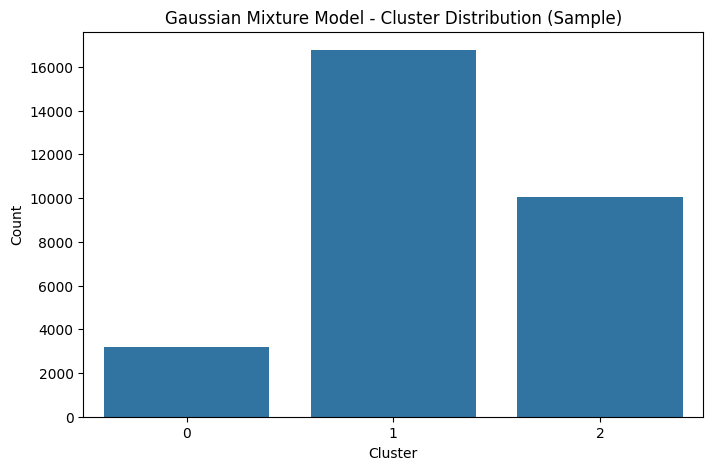

GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS

📊 GMM CLUSTER 0 PROFILE
Samples: 3202 (10.7% of total)
Average assignment probability: 100.0%
--------------------------------------------------
📅 AGE PROFILE: Average age: 3004.0 days (2259.0 days older than overall average)
⏱️ LENGTH OF STAY: Average LOS: 30.2 days (3.7 days longer than overall average)

🐾 ANIMAL TYPES:
  • Dog: 70.8% (15.6% higher than overall)
  • Cat: 28.9% (12.8% lower than overall)
  • Other: 0.2% (2.5% lower than overall)

🏥 INTAKE CONDITIONS:
  • Healthy/Normal: 81.7% (6.0% lower than overall)
  • Injured: 9.3% (3.6% higher than overall)
  • Sick/Medical: 6.0% (2.2% higher than overall)

📊 AGE GROUP (Intake):
  • Senior: 71.5% (63.8% higher than overall)
  • Adult: 28.5% (14.9% higher than overall)
  • Young Adult: 0.1% (31.9% lower than overall)

🗓️ MONTH OF OUTCOME:
  • January: 9.8% (1.5% higher than overall)
  • October: 9.6% (0.7% higher than overall)
  • December: 8.7% (0.6% lower than overall)

🐕 BREED TYPES:
  •

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Assume df_sampled is already defined and preprocessed, and X_array is obtained from your pipeline
# For example, your preprocessing pipeline used:
# numerical_features = ['has_name', 'age_days_outcome', 'los_at_shelter', 'is_fixed']
# categorical_features = ['animal_type', 'age_group_intake', 'month_of_outcome', 'breed_type', 'color_group', 'intake_condition_group']

# Perform Gaussian Mixture Clustering
n_components = 3  # Number of clusters
gm = GaussianMixture(n_components=n_components, n_init=10, random_state=42)
gm.fit(X_array)

# Extract Model Parameters
print("Cluster Weights:\n", gm.weights_)
print("\nCluster Means:\n", gm.means_)
print("\nCovariances:\n", gm.covariances_)
print("\nDid the model converge?:", gm.converged_)
print("Number of iterations:", gm.n_iter_)

# Assign Hard Clustering Labels
df_sampled['gmm_cluster'] = gm.predict(X_array)

# Assign Soft Clustering Probabilities (using the maximum probability per sample)
soft_clusters = gm.predict_proba(X_array)
df_sampled['gmm_soft_cluster'] = soft_clusters.max(axis=1)

# Generate New Synthetic Samples (for demonstration)
X_new, y_new = gm.sample(7)
print("\nGenerated Samples:\n", X_new)
print("\nGenerated Sample Labels:\n", y_new)

# Estimate Density Scores at each sample point
density_scores = gm.score_samples(X_array)
df_sampled['density_score'] = density_scores

# Save clustered dataset to CSV
df_sampled.to_csv("gmm_clustered_animal_shelter_data.csv", index=False)

# Print Clustered Data Sample
print("\nClustered Data Sample:")
print(df_sampled.head())

# Visualize Cluster Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df_sampled['gmm_cluster'])
plt.title("Gaussian Mixture Model - Cluster Distribution (Sample)")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Calculate overall distributions and metrics from df_sampled
overall_animal_dist = df_sampled['animal_type'].value_counts(normalize=True) * 100
overall_intake_dist = df_sampled['intake_condition_group'].value_counts(normalize=True) * 100
overall_age_mean = df_sampled['age_days_outcome'].mean()
overall_los_mean = df_sampled['los_at_shelter'].mean()
overall_age_group_intake_dist = df_sampled['age_group_intake'].value_counts(normalize=True) * 100
overall_month_dist = df_sampled['month_of_outcome'].value_counts(normalize=True) * 100
overall_breed_dist = df_sampled['breed_type'].value_counts(normalize=True) * 100
overall_color_dist = df_sampled['color_group'].value_counts(normalize=True) * 100

print("GAUSSIAN MIXTURE MODEL CLUSTER ANALYSIS")
print("=" * 50)

for cluster in range(n_components):
    cluster_data = df_sampled[df_sampled['gmm_cluster'] == cluster]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df_sampled)) * 100
    avg_prob = cluster_data['gmm_soft_cluster'].mean() * 100
    
    print(f"\n📊 GMM CLUSTER {cluster} PROFILE")
    print(f"Samples: {cluster_size} ({cluster_pct:.1f}% of total)")
    print(f"Average assignment probability: {avg_prob:.1f}%")
    print("-" * 50)
    
    # Age analysis (using 'age_days_outcome')
    cluster_age_mean = cluster_data['age_days_outcome'].mean()
    age_diff = cluster_age_mean - overall_age_mean
    age_diff_text = f"{age_diff:.1f} days {'older' if age_diff > 0 else 'younger'} than overall average"
    print(f"📅 AGE PROFILE: Average age: {cluster_age_mean:.1f} days ({age_diff_text})")
    
    # Length of stay analysis (using 'los_at_shelter')
    cluster_los_mean = cluster_data['los_at_shelter'].mean()
    los_diff = cluster_los_mean - overall_los_mean
    los_diff_text = f"{abs(los_diff):.1f} days {'longer' if los_diff > 0 else 'shorter'} than overall average"
    print(f"⏱️ LENGTH OF STAY: Average LOS: {cluster_los_mean:.1f} days ({los_diff_text})")
    
    # Animal type analysis with comparison
    cluster_animal_dist = cluster_data['animal_type'].value_counts(normalize=True) * 100
    print("\n🐾 ANIMAL TYPES:")
    for animal, pct in cluster_animal_dist.head(3).items():
        overall_pct = overall_animal_dist.get(animal, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {animal}: {pct:.1f}% ({diff_text})")
    
    # Intake condition analysis with comparison
    cluster_intake_dist = cluster_data['intake_condition_group'].value_counts(normalize=True) * 100
    print("\n🏥 INTAKE CONDITIONS:")
    for condition, pct in cluster_intake_dist.head(3).items():
        overall_pct = overall_intake_dist.get(condition, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {condition}: {pct:.1f}% ({diff_text})")
    
    # Age group intake analysis
    cluster_age_group_dist = cluster_data['age_group_intake'].value_counts(normalize=True) * 100
    print("\n📊 AGE GROUP (Intake):")
    for group, pct in cluster_age_group_dist.head(3).items():
        overall_pct = overall_age_group_intake_dist.get(group, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {group}: {pct:.1f}% ({diff_text})")
    
    # Month of outcome analysis
    cluster_month_dist = cluster_data['month_of_outcome'].value_counts(normalize=True) * 100
    print("\n🗓️ MONTH OF OUTCOME:")
    for month, pct in cluster_month_dist.head(3).items():
        overall_pct = overall_month_dist.get(month, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {month}: {pct:.1f}% ({diff_text})")
    
    # Breed type analysis
    cluster_breed_dist = cluster_data['breed_type'].value_counts(normalize=True) * 100
    print("\n🐕 BREED TYPES:")
    for breed, pct in cluster_breed_dist.head(3).items():
        overall_pct = overall_breed_dist.get(breed, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {breed}: {pct:.1f}% ({diff_text})")
    
    # Color group analysis
    cluster_color_dist = cluster_data['color_group'].value_counts(normalize=True) * 100
    print("\n🎨 COLOR DISTRIBUTION:")
    for color, pct in cluster_color_dist.head(3).items():
        overall_pct = overall_color_dist.get(color, 0)
        diff = pct - overall_pct
        diff_text = f"{abs(diff):.1f}% {'higher' if diff > 0 else 'lower'} than overall"
        print(f"  • {color}: {pct:.1f}% ({diff_text})")
    
    # Density score analysis
    avg_density = cluster_data['density_score'].mean()
    print(f"\n📉 DENSITY SCORE: {avg_density:.2f}")
    
    # Cluster summary insights
    print("\n🔑 KEY INSIGHTS:")
    distinctive_features = []
    
    # Check animal type differences
    animal_diffs = [(animal, pct - overall_animal_dist.get(animal, 0))
                    for animal, pct in cluster_animal_dist.items()]
    animal_diffs.sort(key=lambda x: x[1], reverse=True)
    if animal_diffs and animal_diffs[0][1] > 5:
        distinctive_features.append(f"High proportion of {animal_diffs[0][0]}")
    
    # Check intake condition differences
    intake_diffs = [(cond, pct - overall_intake_dist.get(cond, 0))
                    for cond, pct in cluster_intake_dist.items()]
    intake_diffs.sort(key=lambda x: x[1], reverse=True)
    if intake_diffs and intake_diffs[0][1] > 5:
        distinctive_features.append(f"More likely to have {intake_diffs[0][0]} intake condition")
    
    # Age difference insight
    if abs(age_diff) > (overall_age_mean * 0.2):
        distinctive_features.append(f"{'Older' if age_diff > 0 else 'Younger'} animals")
    
    # LOS difference insight
    if abs(los_diff) > (overall_los_mean * 0.2):
        distinctive_features.append(f"{'Longer' if los_diff > 0 else 'Shorter'} shelter stays")
    
    # Print up to three key insights
    for i, feature in enumerate(distinctive_features[:3]):
        print(f"  • {feature}")
    
    # Recommended actions based on insights
    print("\n📋 RECOMMENDED ACTIONS:")
    if intake_diffs and "adoption" in str(intake_diffs[:2]).lower():
        print("  • Analyze factors contributing to successful adoptions in this cluster")
    elif intake_diffs and "transfer" in str(intake_diffs[:2]).lower():
        print("  • Review transfer partner relationships for these animals")
    elif intake_diffs and "euthanasia" in str(intake_diffs[:2]).lower():
        print("  • Develop targeted intervention programs for similar animals")
    
    if age_diff > 0:
        print("  • Consider targeted interventions for older animals")
    
    if los_diff > 0:
        print("  • Investigate factors contributing to longer shelter stays")
    
    print("=" * 50)


These clusters make some intuitive sense but don't have robustness for their characteristics due to their low silhouette scores.

## Affinity Propagation

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Damping: 0.5, Clusters: 684, Silhouette Score: 0.2345


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Damping: 0.6, Clusters: 594, Silhouette Score: 0.2587
Damping: 0.7, Clusters: 586, Silhouette Score: 0.2552


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Damping: 0.8, Clusters: 589, Silhouette Score: 0.2571


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Damping: 0.9, Clusters: 590, Silhouette Score: 0.2556


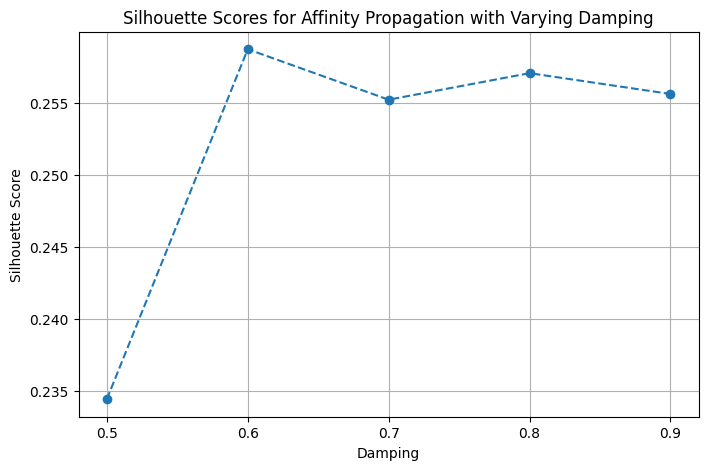

In [55]:
df_sampled = df_clustering.sample(n=10000, random_state=42).reset_index(drop=True)
preproccessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

X_transformed = preproccessor.fit_transform(df_sampled)
X_array = X_transformed.toarray()

# Define a list of damping values to test
damping_values = [0.5, 0.6, 0.7, 0.8, 0.9]
sil_scores = []
n_clusters_list = []

for damping in damping_values:
    # Instantiate Affinity Propagation with the given damping
    aff_prop = AffinityPropagation(damping=damping, random_state=42)
    cluster_labels = aff_prop.fit_predict(X_array)
    n_clusters = len(np.unique(cluster_labels))
    n_clusters_list.append(n_clusters)
    
    # Check if more than one cluster is found (silhouette score requires >=2 clusters)
    if n_clusters > 1:
        score = silhouette_score(X_array, cluster_labels, metric='euclidean')
    else:
        score = -1  # Undefined silhouette score if only one cluster exists
    sil_scores.append(score)
    print(f"Damping: {damping}, Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

# Plot the silhouette scores for different damping values
plt.figure(figsize=(8, 5))
plt.plot(damping_values, sil_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for Affinity Propagation with Varying Damping")
plt.xlabel("Damping")
plt.ylabel("Silhouette Score")
plt.xticks(damping_values)
plt.grid(True)
plt.show()


Silhouette scores for all affinity propagation models are low. Their lack of explanability, along with their lack of computational efficiency make them subpar for the sake of this analysis.